<a href="https://colab.research.google.com/github/DeepankarAcharyya/Customer_Segmentation/blob/master/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries:

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.express as px

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#checking the version of the libraries:
print("Pandas version", pd.__version__)
print("Seaborn version",sns.__version__)

Pandas version 1.0.5
Seaborn version 0.10.1


Reading in the dataset from the provided csv file (the csv file must be present in the same folder as this ipython notebook):

In [3]:
customer_data=pd.read_csv("Mall_Customers.csv")

Getting a glimpse of the dataset:

In [4]:
print("Data:")
customer_data.head()

Data:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Exploring the data-types present in the data:

In [5]:
print("Data-Types:")
customer_data.dtypes

Data-Types:


CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

* We drop the CustomerID column because there is no direct relation between ones CustomerID and ones spending.
* We replace the categorical data of Gender with numerical data: Male=0 and Female=1

In [6]:
customer_data.drop(['CustomerID'], axis=1, inplace=True)
customer_data['Gender']=customer_data['Gender'].replace(['Male','Female'],[0,1])
customer_data.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


We search if any null values are present:

In [7]:
print("Checking for Null Values:")
customer_data.isnull().sum()

Checking for Null Values:


Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

We search through the dataset to see if any duplicate records are present:

In [8]:
print("Checking for Duplicate Values:")
customer_data.duplicated().sum()

Checking for Duplicate Values:


0

We create a heatmap to visualize the correlation between different features present in the dataset:

Checking the Correlation between the features:


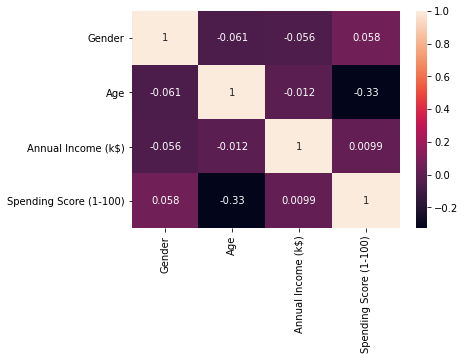

In [9]:
print("Checking the Correlation between the features:")
corr=customer_data.corr()
sns.heatmap(corr, annot=True);

From the above heatmap, we can analyze the correlation between the annual income of the customer and their spending score.

Since we are going to implement k-means algorithm, the value of k (the number of clusters) plays a very crucial part in the final segmentation. 
We use the elbow method to determine the value of k.

Score v/s n_clusters plot


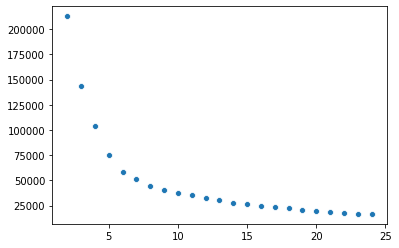

In [10]:
score=[]
k=range(2,25)
for i in k:
  model=KMeans(n_clusters=i)
  model.fit(customer_data)
  score.append(model.inertia_)

print("Score v/s n_clusters plot")
sns.scatterplot(x=k,y=score);

From the above diagram we get the elbow point at around k=6. So, we set n_clusters=6 while initiating KMeans.

In [11]:
final_model=KMeans(n_clusters=6)
pred=final_model.fit_predict(customer_data)
pred=pd.DataFrame(pred, columns=['Cluster_ID'])

In [12]:
final_df=pd.concat([customer_data, pred],axis=1)

Visualization of the results:

We first try to visualize the clusters so formed using 2D scatter plots, but as we can see all the clusters are not properly distinguishable.

Annual Income v/s Age


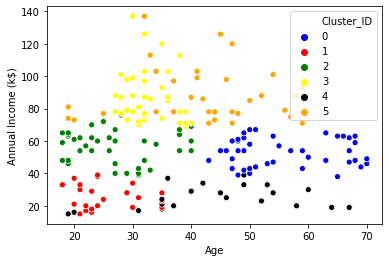

In [13]:
print("Annual Income v/s Age")
sns.scatterplot(x=final_df['Age'],y=final_df['Annual Income (k$)'], hue=final_df['Cluster_ID'], palette=['Blue','Red', 'Green','Yellow','Black','Orange']);

Spending Score v/s Annual Income


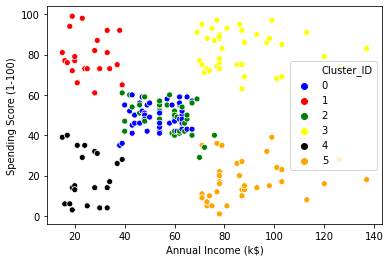

In [14]:
print("Spending Score v/s Annual Income")
sns.scatterplot(x=final_df['Annual Income (k$)'],y=final_df['Spending Score (1-100)'], hue=final_df['Cluster_ID'], palette=['Blue','Red', 'Green','Yellow','Black','Orange']);

So we next try to visualize using 3D scatter plots and we are able to properly distinguish between the clusters.

In [15]:
fig = px.scatter_3d(final_df, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age',color='Cluster_ID')
fig.show()

The final dataframe that we obtain:

In [16]:
print("Final Data:")
final_df.head()

Final Data:


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_ID
0,0,19,15,39,4
1,0,21,15,81,1
2,1,20,16,6,4
3,1,23,16,77,1
4,1,31,17,40,4


Visualizing the gender and age distribution:


In [22]:
final_df['Gender']=final_df['Gender'].replace([0,1],['Male','Female'])
fig = px.scatter(final_df, x='Gender', y='Spending Score (1-100)',color='Cluster_ID')
fig.show()

In [20]:
fig = px.scatter(final_df, x='Age', y='Spending Score (1-100)',color='Cluster_ID')
fig.show()